# Unit 5 - Financial Planning

In [83]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [84]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [85]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.2

In [86]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [87]:
# Fetch current BTC price
btc_price = requests.get(btc_url)
btc_price.content

# Fetch current ETH price
eth_price = requests.get(eth_url)
eth_price.content

# Convert data to Json to identify the needed data 
btc_data = btc_price.json()
eth_data = eth_price.json()

btc_price = btc_data['data']['1']['quotes']['CAD']['price']
eth_price = eth_data['data']['1027']['quotes']['CAD']['price']

# Compute current value of my crpto
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $58867.42
The current value of your 5.2 ETH is $18126.12


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [88]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [89]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_API_SECRET_KEY")


# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [90]:
# Format current date as ISO format
today = pd.Timestamp("2022-01-31", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
current_prices = api.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today,
    limit=1000
).df

# Preview DataFrame
current_prices.head(5)

AGG                                      SPY  \
                             open    high    low   close    volume    open   
time                                                                         
2022-01-31 00:00:00-05:00  111.64  111.89  111.6  111.78  11437834  441.24   

                                                               
                             high     low    close     volume  
time                                                           
2022-01-31 00:00:00-05:00  450.28  439.81  449.815  128202383

In [91]:
# Pick AGG and SPY close prices
agg_close_price = current_prices["AGG"]["close"].item()
spy_close_price = current_prices["SPY"]["close"].item()

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $111.78
Current SPY closing price: $449.815


In [92]:
# Compute the current value of shares
my_agg_value = my_agg * agg_close_price
my_spy_value = my_spy * spy_close_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $22490.75
The current value of your 200 AGG shares is $22356.00


### Savings Health Analysis

In [93]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
total_portfolio = {'Amount': [my_btc_value+my_eth_value, my_spy_value+my_agg_value]}


# Create savings DataFrame
df_savings = pd.DataFrame(total_portfolio,index=['Crypto','Equities'])

# Display savings DataFrame
display(df_savings)

,Amount
Crypto,76993.535724
Equities,44846.750000


array([<AxesSubplot:ylabel='Amount'>], dtype=object)

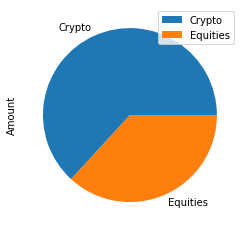

In [94]:
# Plot savings pie chart
df_savings.plot(kind='pie', subplots=True)

In [95]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = df_savings.sum().item()


# Validate saving health
if total_savings > emergency_fund:
    print("Congratulations on having more than 3x your monthly income.")
elif total_savings == emergency_fund:
    print("Congratulations on reaching your goal of 3x your monthly income.")
else:
    print(f'You are ${emergency_fund - total_savings} away from reaching your goal of 3x your monthly income.')

Congratulations on having more than 3x your monthly income.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [96]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [97]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_assets = api.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date,
    limit=1000
).df

# Display sample data
df_assets.head()

AGG                                         \
                             open     high       low    close     volume   
time                                                                       
2017-05-10 00:00:00-04:00  108.60  108.660  108.4400  108.520  1427511.0   
2017-05-11 00:00:00-04:00  108.35  108.540  108.3435  108.515  1773499.0   
2017-05-12 00:00:00-04:00  108.81  108.940  108.7800  108.920  1136553.0   
2017-05-15 00:00:00-04:00  108.85  108.940  108.8200  108.890  1620264.0   
2017-05-16 00:00:00-04:00  108.88  109.101  108.8800  109.000  1394153.0   

                              SPY                                       
                             open    high     low    close      volume  
time                                                                    
2017-05-10 00:00:00-04:00     NaN     NaN     NaN      NaN         NaN  
2017-05-11 00:00:00-04:00  239.35  239.57  238.13  239.410  45435690.0  
2017-05-12 00:00:00-04:00  239.09  239.21  238.67  239.030  35283567.0  
2017-05-15 00:00:00-04:00  239.47  240.44  239.45  240.245  42230620.0  
2017-05-16 00:00:00-04:00  240.62  240.67  239.63  240.100  37206183.0

In [98]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
mc_30yrs = MCSimulation(
    portfolio_data = df_assets,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [99]:
# Printing the simulation input data
mc_30yrs.portfolio_data.head()

AGG                                         \
                             open     high       low    close     volume   
time                                                                       
2017-05-10 00:00:00-04:00  108.60  108.660  108.4400  108.520  1427511.0   
2017-05-11 00:00:00-04:00  108.35  108.540  108.3435  108.515  1773499.0   
2017-05-12 00:00:00-04:00  108.81  108.940  108.7800  108.920  1136553.0   
2017-05-15 00:00:00-04:00  108.85  108.940  108.8200  108.890  1620264.0   
2017-05-16 00:00:00-04:00  108.88  109.101  108.8800  109.000  1394153.0   

                                           SPY                           \
                          daily_return    open    high     low    close   
time                                                                      
2017-05-10 00:00:00-04:00          NaN     NaN     NaN     NaN      NaN   
2017-05-11 00:00:00-04:00    -0.000046  239.35  239.57  238.13  239.410   
2017-05-12 00:00:00-04:00     0.003732  239.09  239.21  238.67  239.030   
2017-05-15 00:00:00-04:00    -0.000275  239.47  240.44  239.45  240.245   
2017-05-16 00:00:00-04:00     0.001010  240.62  240.67  239.63  240.100   

                                                    
                               volume daily_return  
time                                                
2017-05-10 00:00:00-04:00         NaN          NaN  
2017-05-11 00:00:00-04:00  45435690.0          NaN  
2017-05-12 00:00:00-04:00  35283567.0    -0.001587  
2017-05-15 00:00:00-04:00  42230620.0     0.005083  
2017-05-16 00:00:00-04:00  37206183.0    -0.000604

In [100]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
mc_30yrs.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\Ksenija\Desktop\python_homework_05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.005364,0.998547,1.005306,0.995324,1.011308,1.007855,0.997406,0.992912,1.000327,1.010625,...,0.994446,0.999701,1.005649,1.001492,0.994195,1.003256,0.995233,1.006666,1.003200,1.002050
2,1.008277,1.002673,1.011174,1.005276,1.009911,1.004676,0.996179,0.994166,1.000872,1.004940,...,0.998248,0.994405,1.006868,0.994833,0.980402,1.004599,0.992658,1.011642,1.012265,1.007634
3,1.010902,0.994171,1.002702,1.004721,1.010616,1.006004,0.997920,0.995692,0.996962,1.004604,...,0.995469,0.989808,1.002092,0.995779,0.982331,1.000641,0.997232,1.013799,1.013385,1.002535
4,1.012914,0.994493,1.007350,0.999868,1.018602,1.003748,0.998601,0.994741,0.991021,1.014105,...,0.985791,0.994434,0.995812,0.986604,0.991011,1.004766,0.999361,1.006722,1.000816,0.997500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,4.280794,4.450446,11.238040,15.401419,6.215950,5.261175,6.972430,9.944453,6.586849,6.463916,...,5.773253,7.328127,19.229126,3.953311,6.528120,9.007271,3.382589,12.178454,17.095418,6.261033
7557,4.247722,4.445878,11.262101,15.610837,6.182200,5.290170,6.979001,9.977271,6.567214,6.492279,...,5.726003,7.266512,19.175697,3.945362,6.555678,8.938854,3.380544,12.230518,17.129924,6.251880
7558,4.244108,4.450146,11.244068,15.548198,6.176767,5.317383,6.976142,10.035686,6.529578,6.537108,...,5.685800,7.254109,19.317179,3.955743,6.552748,8.908645,3.396774,12.390369,17.247716,6.327222
7559,4.276010,4.479388,11.110188,15.660877,6.249987,5.313851,7.015758,9.977773,6.500570,6.617437,...,5.638864,7.230848,19.317572,3.979269,6.567310,9.055839,3.384227,12.383348,17.266408,6.397297


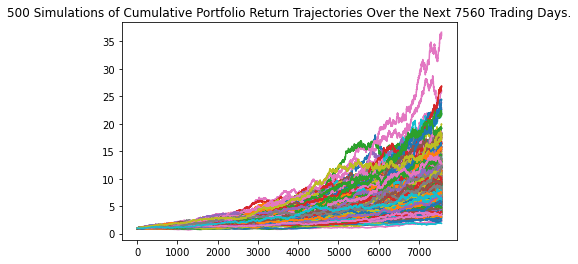

In [101]:
# Plot simulation outcomes
cumulative_returns = mc_30yrs.plot_simulation()

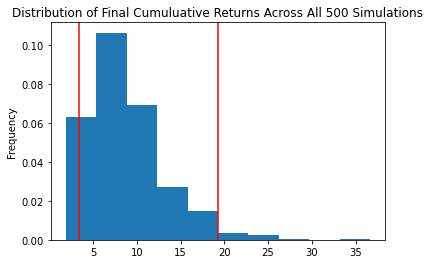

In [102]:
# Plot probability distribution and confidence intervals
pdist_ci = mc_30yrs.plot_distribution()

### Retirement Analysis

In [103]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_stats = mc_30yrs.summarize_cumulative_return()

# Print summary statistics
print(summary_stats)

count           500.000000
mean              8.732479
std               4.456812
min               1.871621
25%               5.584587
50%               7.767834
75%              10.979999
max              36.674370
95% CI Lower      3.385798
95% CI Upper     19.225474
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [104]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(summary_stats[8]*initial_investment,2)
ci_upper = round(summary_stats[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $67715.96 and $384509.49


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [105]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(summary_stats[8]*initial_investment,2)
ci_upper = round(summary_stats[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $101573.95 and $576764.23


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [106]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
mc_5yrs = MCSimulation(
    portfolio_data = df_assets,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [107]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
mc_5yrs.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\Ksenija\Desktop\python_homework_05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000565,0.991100,0.995707,0.994087,0.999569,1.000641,1.001232,1.005089,1.002912,0.994040,...,0.999158,1.003042,1.000736,1.009387,0.998608,1.012100,1.002450,0.999907,0.998304,1.005731
2,0.997432,0.993848,0.998718,0.987614,0.996073,0.995338,1.011962,0.998306,0.996646,0.994087,...,1.002326,1.002235,1.004977,1.014018,1.001000,1.028913,0.996065,1.004813,1.003464,0.999935
3,1.002535,0.991325,1.002080,0.992956,0.999807,0.988939,1.016989,0.994706,0.997104,0.994839,...,0.993669,0.997695,1.004983,1.014596,0.999924,1.026352,0.995776,1.000662,1.013328,0.999228
4,1.008861,0.985046,0.999218,0.992931,1.005621,0.984592,1.012391,0.984123,1.000528,0.997973,...,0.999752,1.001783,1.000291,1.011650,0.999740,1.028059,1.000479,1.006460,1.013933,0.996237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.232579,1.280185,1.764675,1.588440,1.662521,1.620740,1.102167,1.684950,1.489221,1.374969,...,1.591242,1.339239,1.835674,1.179936,2.138553,1.319150,1.545729,1.376259,1.714121,1.292615
1257,1.225400,1.272224,1.773902,1.576085,1.653167,1.624740,1.094902,1.703013,1.491206,1.383683,...,1.577745,1.342720,1.820400,1.188273,2.125409,1.313374,1.532543,1.372025,1.724650,1.297526
1258,1.221794,1.273150,1.765965,1.568163,1.671577,1.619110,1.098056,1.692432,1.498345,1.388852,...,1.573301,1.340946,1.804332,1.185974,2.152921,1.301450,1.532269,1.376337,1.722750,1.298499
1259,1.223355,1.273629,1.765897,1.555485,1.668937,1.606891,1.103925,1.696546,1.504430,1.401450,...,1.586594,1.340560,1.810010,1.204036,2.149775,1.300260,1.536167,1.384390,1.718238,1.296143


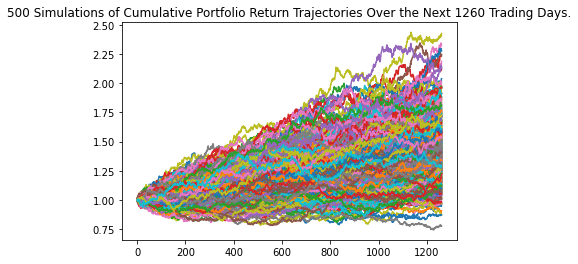

In [108]:
# Plot simulation outcomes
cumulative_returns_2 = mc_5yrs.plot_simulation()

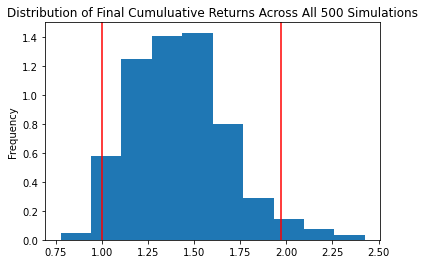

In [109]:
# Plot probability distribution and confidence intervals
pdist_ci_2 = mc_5yrs.plot_distribution()

In [110]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_stats_2 = mc_5yrs.summarize_cumulative_return()


# Print summary statistics
print(summary_stats_2)

count           500.000000
mean              1.423779
std               0.261129
min               0.776914
25%               1.239841
50%               1.402513
75%               1.580230
max               2.425643
95% CI Lower      1.003817
95% CI Upper      1.970960
Name: 1260, dtype: float64


In [111]:
# Set initial investment
initial_investment_2= 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_5 = round(summary_stats_2[8]*initial_investment_2,2)
ci_upper_5 = round(summary_stats_2[9]*initial_investment_2,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_2} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_5} and ${ci_upper_5}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $60229.01 and $118257.61


### Ten Years Retirement Option

In [112]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
mc_10yrs = MCSimulation(
    portfolio_data = df_assets,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*10)

In [113]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
mc_10yrs.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\Ksenija\Desktop\python_homework_05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.997453,1.001105,0.995919,1.001352,1.000949,1.002694,1.005477,1.000767,0.991392,1.000421,...,0.992478,0.997825,1.001266,1.000086,0.999688,1.000416,0.999895,0.998996,1.004302,1.001678
2,1.006572,1.004508,0.997088,1.008433,1.006289,0.999396,1.010434,0.986995,0.980882,1.004879,...,1.002468,0.988555,0.989892,1.001726,1.004911,0.986278,1.004469,0.996289,0.997978,1.010755
3,1.009915,1.008169,0.993378,1.012879,1.003571,0.991969,1.011979,0.983281,0.976305,1.006282,...,1.010918,0.979351,0.977513,0.997234,1.009468,0.988147,1.006925,1.004470,0.997816,0.998220
4,1.014087,0.999276,0.986406,1.018893,1.004745,0.985438,1.011856,0.994021,0.983736,1.007140,...,1.018918,0.983132,0.979753,0.999099,1.005390,0.979435,1.009660,1.008023,0.989614,1.010761
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,3.197453,2.524924,2.086889,2.304498,2.725758,1.820143,3.336164,2.828844,1.526756,2.044792,...,2.013128,2.569417,2.990815,2.236524,0.931983,1.640503,1.993978,1.656054,2.080497,1.971695
2517,3.150189,2.535221,2.086817,2.318683,2.753468,1.822466,3.320354,2.817599,1.531725,2.061261,...,2.012562,2.569279,2.973650,2.222488,0.938236,1.638400,1.996485,1.658597,2.072277,1.960123
2518,3.151899,2.548587,2.089268,2.342752,2.741097,1.833469,3.327012,2.822110,1.532824,2.046260,...,1.992246,2.572937,2.954289,2.225800,0.935961,1.641832,1.990056,1.664193,2.090776,1.958879
2519,3.152435,2.559210,2.087782,2.355100,2.776634,1.852146,3.351483,2.839001,1.553349,2.040108,...,1.993853,2.577221,2.927654,2.213815,0.936651,1.653802,1.995630,1.662672,2.086962,1.951231


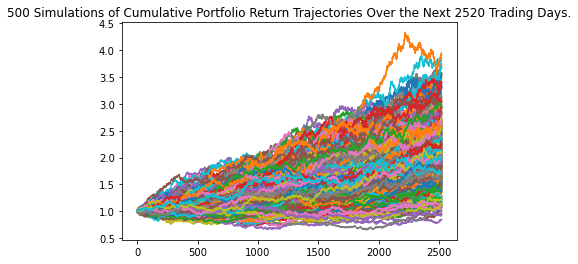

In [114]:
# Plot simulation outcomes
cumulative_returns_3 = mc_10yrs.plot_simulation()

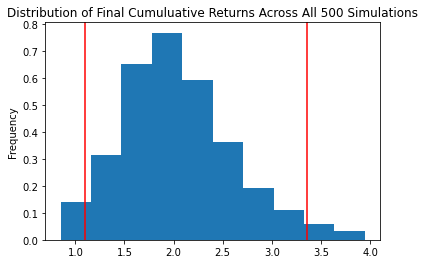

In [115]:
# Plot probability distribution and confidence intervals
pdist_ci_3 = mc_10yrs.plot_distribution()

In [116]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_stats_3 = mc_10yrs.summarize_cumulative_return()

# Print summary statistics
print(summary_stats_3)

count           500.000000
mean              2.041479
std               0.566139
min               0.848748
25%               1.641921
50%               1.975805
75%               2.351949
max               3.947138
95% CI Lower      1.099966
95% CI Upper      3.355626
Name: 2520, dtype: float64


In [117]:
# Set initial investment
initial_investment_3= 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_10 = round(summary_stats_3[8]*initial_investment_2,2)
ci_upper_10 = round(summary_stats_3[9]*initial_investment_2,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_3} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_10} and ${ci_upper_10}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $65997.94 and $201337.55
